Import all the code. If you get import errors, review the installation proceedure. Make sure you are using the correct kernel. You will need to explicitly set up a kernel for the environment you've created. 

In [1]:
from smokedetectoroptimization.optimizer import (optimize, evaluate_optimization,
                                                 optimization_logger, evaluate_locations)
from smokedetectoroptimization.smoke_source import SmokeSource, smoke_logger
from smokedetectoroptimization.constants import (ALARM_THRESHOLD, FALSE_ALARM_THRESHOLD, 
                                                 SMOOTH_PLOTS, SINGLE_OBJECTIVE_FUNCTIONS_TTA,
                                                 SINGLE_OBJECTIVE_FUNCTIONS_MC)

In [2]:
import sys
# This is a hack, but it lets us import something from the folder above.
# I will address it at some point soon.
sys.path.append("..")
from constants import (SMOKE_FOLDERS, SMOKE_FOLDERS_LONG,
                       FALSE_ALARM_FOLDERS, FALSE_ALARM_FOLDERS_LONG,
                       NASA_DETECTORS, SOURCE_LOCATIONS)


The goal is to set the level of detail we get printed out. The smoke logger appears to be broken since it should display which directory it's loading from.

In [3]:
import logging
optimization_logger.setLevel(logging.ERROR)
smoke_logger.setLevel(logging.DEBUG)

Parameterization can be "xy", "yz", "xz", "xyz", or "phi_theta"  
Function type can be "multiobjective_competing", "multiobjective_counting", or "worst_case", which is the one we are used to. "fastest" and "second are also supported, but I would not recommend using them.  
Interplolation method can be "nearest", which takes the nearest value, or "linear" or "cubic" The later two seem to take much longer.  

In [4]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = True

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\laptop_1000_steps


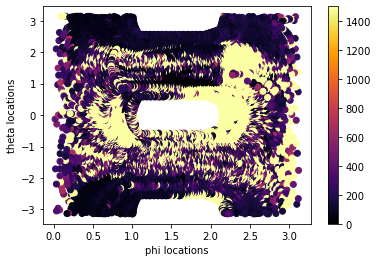

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\wall_computer_1000_steps


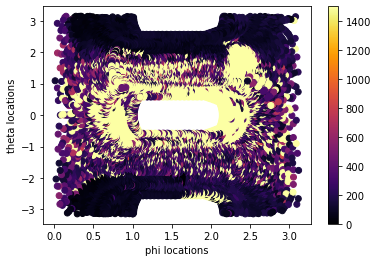

In [5]:
sources = []
# This notation just takes the first two folders
# This makes it much faster to evaluate the optimization
for data_dir in SMOKE_FOLDERS_LONG:
    # create a smoke source and then get it's time to alarm with a given parameterization
    print(f"Loading {data_dir}")
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))

In [6]:
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = False

bad_sources = []
# This notation just takes the first two folders
# This makes it much faster to evaluate the optimization
for data_dir in FALSE_ALARM_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    print(f"Loading {data_dir}")
    bad_sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\bike_full3D


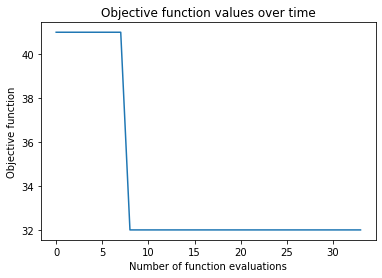

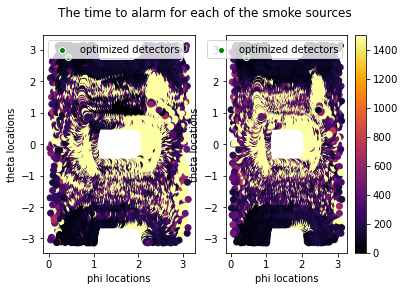

Showing a 3D plot of time to alarm with final locations in green


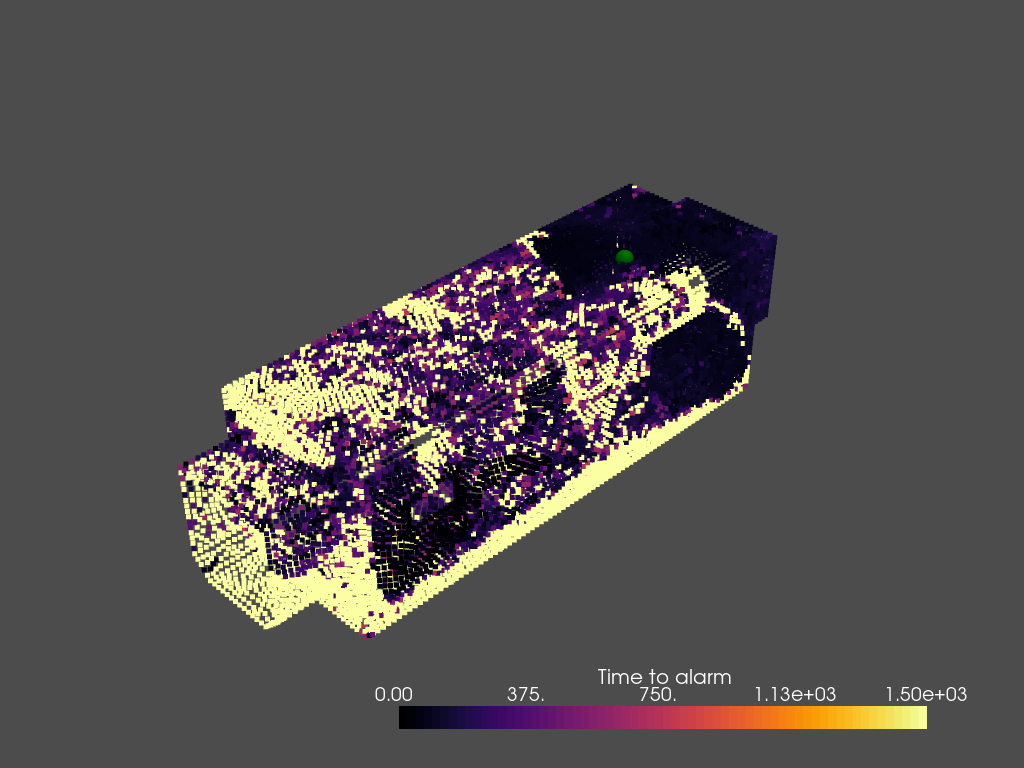

Showing a 3D plot of time to alarm with final locations in green


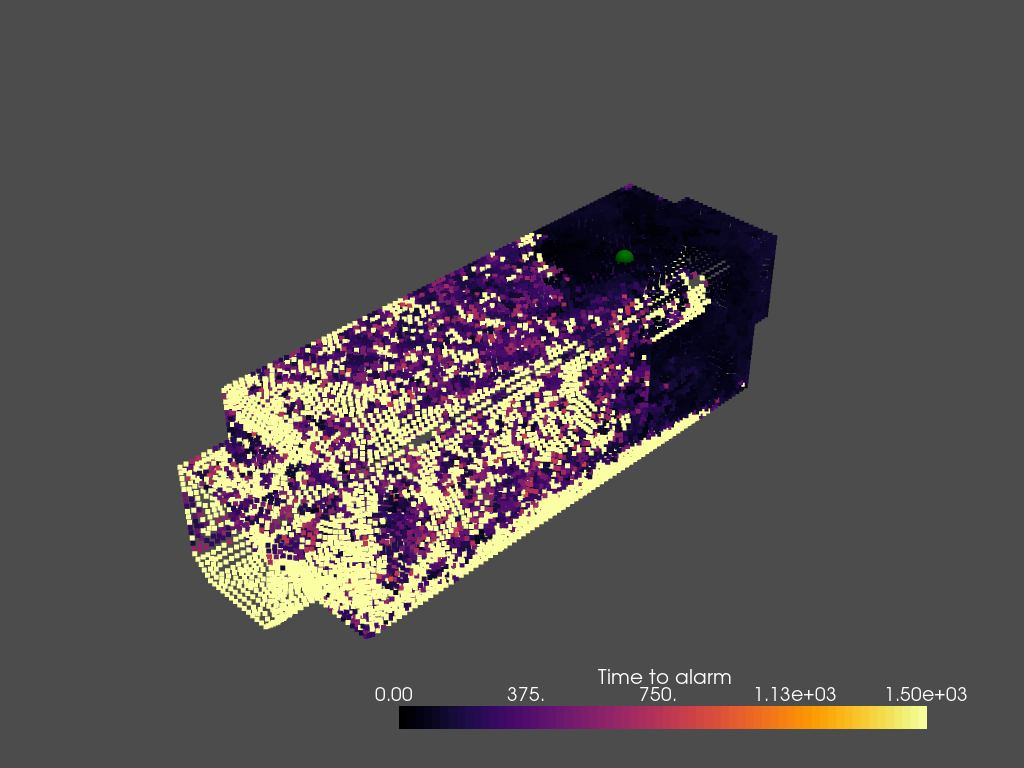

Begining to visualize slices. May take a while


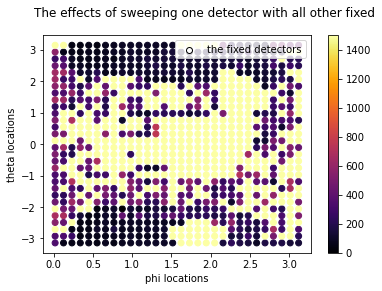

Parameterized, phi location : p, theta location : a
3D, X : X, Y : Y, Z : Z
------------
The final value was 32.0


       fun: 32.0
 iter_vals: [41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]
   message: 'Optimization terminated successfully.'
      nfev: 1053
       nit: 34
   success: True
         x: array([0.43169287, 2.77936608])

In [9]:
optimize(sources=sources, 
        num_detectors=1,
        bad_sources=bad_sources)

['multiobjective_counting', 'multiobjective_competing']


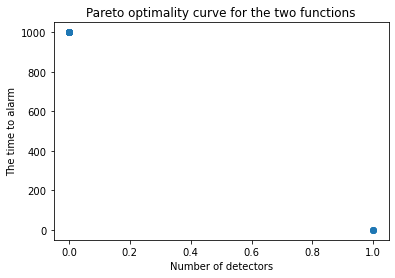

In [13]:
from smokedetectoroptimization.constants import MULTI_OBJECTIVE_FUNCTIONS
print(MULTI_OBJECTIVE_FUNCTIONS)
optimize(sources=sources, 
        num_detectors=1,
        function_type='multiobjective_competing',
        bad_sources=bad_sources)